In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Heart rate analysis of users

In [2]:
df1=pd.read_csv("/home/sunit.kapuria/data analyst course/case_study_2/Fitabase Data 4.12.16-5.12.16/heartrate_seconds_merged.csv")

In [3]:
df1.head()

,Id,Time,Value
0,2022484408,4/12/2016 7:21:00 AM,97
1,2022484408,4/12/2016 7:21:05 AM,102
2,2022484408,4/12/2016 7:21:10 AM,105
3,2022484408,4/12/2016 7:21:20 AM,103
4,2022484408,4/12/2016 7:21:25 AM,101


In [5]:
df1['Id'].nunique()

14

* Heart-rate tracking data is only available for 14 users
* Data checks the heart rate of users each second
* In adults, the heart usually beats between 60 and 100 times per minute. Doctors usually consider a heart rate of over 100 beats per minute to be too fast, though this varies among individuals.
* we will categorise the heart rate as too fast, normal, too slow
* (<60) = too slow, 0,
* (60-100) = normal 1,
* (>100) = too fast 2

In [7]:
df1.shape

(2483658, 3)

In [8]:
def heartrate(x):
    if x<60:
        return 0
    elif x>=60 and x<=100:
        return 1
    else:
        return 2

In [9]:
df1['heart_cat']=df1['Value'].apply(heartrate)

In [10]:
df1.head()

,Id,Time,Value,heart_cat
0,2022484408,4/12/2016 7:21:00 AM,97,1
1,2022484408,4/12/2016 7:21:05 AM,102,2
2,2022484408,4/12/2016 7:21:10 AM,105,2
3,2022484408,4/12/2016 7:21:20 AM,103,2
4,2022484408,4/12/2016 7:21:25 AM,101,2


<AxesSubplot:xlabel='heart_cat', ylabel='count'>

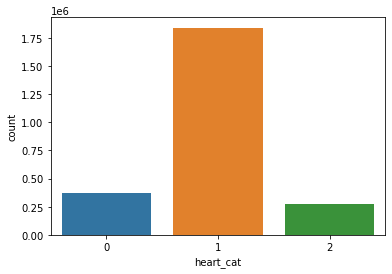

In [19]:
sns.countplot(x='heart_cat', data=df1)

In [32]:
tuple(range(df1['Id'].nunique()))

(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13)

Text(0.5, 1.0, 'Proportion of Heart Rates Among Users ')

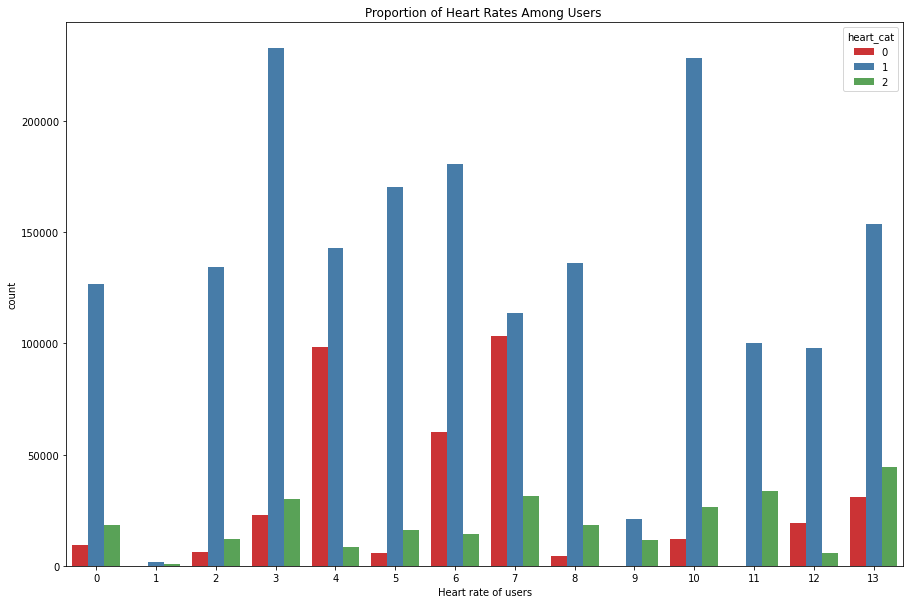

In [71]:
fig, ax = plt.subplots(figsize=(15,10))
sns.countplot(x='Id', hue='heart_cat', data=df1,  palette="Set1")
plt.xlabel('Heart rate of users')
ax.set_xticks(tuple(range(df1['Id'].nunique())))
ax.set_xticklabels(tuple(range(df1['Id'].nunique())))
plt.title('Proportion of Heart Rates Among Users ')

In [72]:
fig.savefig('/home/sunit.kapuria/data analyst course/case_study_2/heart1.png')

* Lets check what is the count of each category

In [13]:
df1.groupby('heart_cat').count()['Id']

heart_cat
0     373015
1    1839802
2     270841
Name: Id, dtype: int64

In [54]:
mean_xx=np.array(df1.groupby('heart_cat').count()['Id'])
mean_xx
mean_perc=np.round(mean_xx/sum(mean_xx),2)
mean_perc

array([0.15, 0.74, 0.11])

Text(0.8, 0.1, '11%')

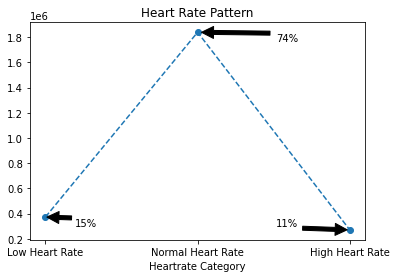

In [73]:
fig, ax = plt.subplots()
plt.plot(df1.groupby('heart_cat').count()['Id'],  'o--')
plt.xlabel('Heartrate Category')
ax.set_xticks((0,1,2))
ax.set_xticklabels(('Low Heart Rate', 'Normal Heart Rate', 'High Heart Rate'))
plt.title('Heart Rate Pattern')
ax.annotate('74%', xy=(1, 1839802),  xycoords='data',
            xytext=(0.8, 0.95), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top',
            )
ax.annotate('15%', xy=(0,373015),  xycoords='data',
            xytext=(0.2, 0.1), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top',
            )
ax.annotate('11%', xy=(2,270841),  xycoords='data',
            xytext=(0.8, 0.1), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            horizontalalignment='right', verticalalignment='top',
            )

### Findings:

* 74% of heartrate falls under Normal for all users
* 15% falls under Low heart rate
* 11% falls under High heart rate
* The pattern of heart rate varies from user to user.
* Some users are obsreved to have a good acount of low heart rate and high hearrate, and this can be used to alert the user about the same.
* For same reason the data is only available for 14 users out of 33 users.
* We should further look into the reason of data non-availability. 
* Question arises: Is the data not available because the user have not switched on the feature to track heart rate?
* Since most of the users have other details of the device which clearly shows that more than 14 users have worn the device most of the time. Therefore, it can be suggested that the feature of tracking the heart rate is not switched on by the users.
* Or, For some reason, such as improper wearing of the device might be a reason of not detecting the heart rate.

* Recommendations:
> Bellabit can focus in this area of " tracking heart rate", as it seems this section is very important in tracking the health of the user and can be a good selling point for the smart device.

In [74]:
fig.savefig('/home/sunit.kapuria/data analyst course/case_study_2/heart2.png')

In [67]:
df1.head()

,Id,Time,Value,heart_cat
0,2022484408,4/12/2016 7:21:00 AM,97,1
1,2022484408,4/12/2016 7:21:05 AM,102,2
2,2022484408,4/12/2016 7:21:10 AM,105,2
3,2022484408,4/12/2016 7:21:20 AM,103,2
4,2022484408,4/12/2016 7:21:25 AM,101,2


In [68]:
df1.to_csv('/home/sunit.kapuria/data analyst course/case_study_2/new_heart_rate.csv', index=False)

### This data is saved for further visualization in Tableau